In [1]:
 !nvidia-smi

zsh:1: command not found: nvidia-smi


# **Introduction to Machine Learning**
 

# TensorFlow & Keras
 
- TensorFlow is an open source machine learning library for research and production.<br>
It offers tools, libraries and resources that makes it easy for you to build and deploy ML models:
 

- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.<br>
It allows for easy and fast prototyping and supports both convolutional networks and recurrent networks.<br> 


### Import TensorFlow
In this tutorial is used version 2.1.0.<br> 

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import time, h5py, os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
print(device_lib.list_local_devices())

print("TensorFlow version: {}".format(tf.__version__))


/Users/filippomoscatelli/Desktop/Modelli della percezione/Pyton/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15513195235950076953
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 14908867808149751943
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]
TensorFlow version: 2.16.2


2024-11-27 16:32:17.430690: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-27 16:32:17.430708: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-27 16:32:17.430711: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-27 16:32:17.431018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-27 16:32:17.431028: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## **- Build a Single Layer Perceptron**

- Let's build a single layer perceptron composed by one dense layer, using *Tensorflow* only.

In [4]:
def one_dense_layer(x, n_in, n_out):
    # n_in: number of inputs, n_out: number of outputs
    # y = sigmoid(W*x + b)
    # W = [1,1]
    # b = 1
    W = tf.ones((n_in, n_out))
    b = tf.ones((1, n_out))
    z = tf.matmul(x,W) + b
    out = tf.sigmoid(z)
    return out

- Build the same Single Layer Perceptron with *Keras*

In [5]:
# Define the number of inputs and outputs
n_output_nodes = 2
 
# First define the model 
model = tf.keras.Sequential() # model lets us define a linear stack of network layers.

# define our single fully connected network layer
dense_layer = tf.keras.layers.Dense(n_output_nodes, input_dim=2, activation='sigmoid',kernel_initializer="Ones",bias_initializer="Ones")

# Add the dense layer to the model
model.add(dense_layer)

/Users/filippomoscatelli/Desktop/Modelli della percezione/Pyton/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-27 16:35:16.570513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-27 16:35:16.570697: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Test the model

In [6]:
x_input = tf.constant([[1,2.]], shape=(1,2))
print(model(x_input))

tf.Tensor([[0.98201376 0.98201376]], shape=(1, 2), dtype=float32)


### **- Build a Multilayer perceptron**


Let's build a multilayer perceptron; MLPs are fully connected, each node in one layer connects with a certain weight to every node in the following layer. 
 
Try to build one composed by two hidden dense layer with ReLU activation and one dense output layer(units=1) with sigmoid activation.



### - Model parameters
There are many parameters to choose from: the Optimizer, the Loss Function and the Metrics to use.<br>

**- Loss functions** are used to compare the network's predicted output  with the real output, in each iteration of the backpropagations algorithm; loss functions are used to tell the model how the weights should be updated.<br>
Common loss functions are: 
- 'sparse_categorical_crossentropy' (for multi object classification)
- 'binary_crossentropy' (for binary classification)
- 'mean_squared_error' (for output real)
<br><br>

**- Metrics** are used to evaluate a model; common metrics are:

- precision [TP/(TP+FP)], 
- recall [TP/(TP+FN)], 
- accuracy [(TP+TN)/(TP+FP+FN+TN)], 
- ..<br>

**- Optimizer** determines the update rules of the weights.<br>
The performance and update speed may heavily vary from optimizer to optimizer. Some optimizer are:
- Adam
- SGD
- RMSprop

In [7]:
n_input_nodes = 100
units = 32
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(units, activation='relu', input_dim=n_input_nodes))
model.add(tf.keras.layers.Dense(units, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Generate dummy data

data = np.random.random((1000, n_input_nodes))
labels = np.random.randint(2, size=(1000, 1))

#TOY: TO BE RUN IN CLASSROOM
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10


2024-11-27 16:35:36.334700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4890 - loss: 0.7479
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4793 - loss: 0.7307
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5076 - loss: 0.7160
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4876 - loss: 0.7116
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4905 - loss: 0.7050
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5091 - loss: 0.7025
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5006 - loss: 0.7009
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5070 - loss: 0.6957
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4789 - loss: 0.7034
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5465 - loss: 0.6907


In [9]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=100, batch_size=32)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5124 - loss: 0.6910
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5198 - loss: 0.6905
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5541 - loss: 0.6870
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5403 - loss: 0.6897
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5645 - loss: 0.6801
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5532 - loss: 0.6846
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5476 - loss: 0.6806
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5832 - loss: 0.6738
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5857 - loss: 0.6727
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5570 - loss: 0.6800
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5575 - loss: 0.6757
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy:

### **-Build a Neural Network on real data**
*  Import the dataset
*  Build a model
*  Train the model 
*  Evaluate the model

### - Import Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
 
![alt text](http://lanzarotti.di.unimi.it/images_notebook/fashion-mnist.png)


In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()
x_learn, x_test = x_learn / 255.0, x_test / 255.0 # normalization 
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.2, random_state=42) # split learn in train,val

print(x_train.shape, x_val.shape, x_test.shape)

(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)


Plot some sample from the training set:

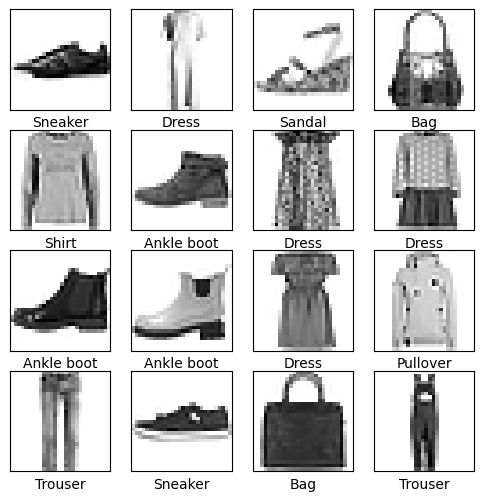

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### -Build a Model

![alt text](http://lanzarotti.di.unimi.it/images_notebook/nn.png) <br>

#### How many layers?

It depends on different factors: for example on the data available, on the complexity of the problem, on the computational power and so on.
 

#### Which activation functions?

There exists different choices, one of the most used is Relu but it depends on the data and on the network architecture.
<br><br> 

In [12]:
# Network Parameters
num_classes = 10 # Fashion-MNIST classes

#### Build a model with this structure: Flatten+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(softmax)

In [13]:
# https://keras.io/layers/core/
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),  # Normalizzazione
    tf.keras.layers.Conv2D(32, 3, activation='relu'),            # Primo strato convoluzionale
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),            # Secondo strato convoluzionale
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),           # Terzo strato convoluzionale
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),                                 # Dropout
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),                                 # Dropout
    tf.keras.layers.Dense(10, activation='softmax')              # Output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/Users/filippomoscatelli/Desktop/Modelli della percezione/Pyton/.venv/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### - Model parameters
There are many parameters to choose from: the Optimizer, the Loss Function and the Metrics to use.<br>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm; loss functions are used to tell the model how the weights should be updated.<br>
Common loss functions are: 
- sparse_categorical_crossentropy,
- mean_squared_error
- mean_absolute_error
- categorical_crossentropy (NB: categorical_crossentropy produces a one-hot array containing the probable match for each category,sparse_categorical_crossentropy produces a category index of the most likely matching category)
- categorical_hinge<br><br>

**Metrics** are used to evaluate a model; common metrics are:

- precision [TP/(TP+FP)], 
- recall [TP/(TP+FN)], 
- accuracy [(TP+TN)/(TP+FP+FN+TN)], 
- ..<br>

**Optimizer** determines the update rules of the weights.<br>
The performance and update speed may heavily vary from optimizer to optimizer. Some optimizer are:
- Adam
- SGD
- RMSprop

In [14]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Mette 'accuracy' in una lista

### Train the model 
The **batch size** is a number of samples processed before the model is updated.<br>
The **number of epochs** is the number of complete passes through the training dataset.

In [15]:
#TOY: TO BE RUN IN CLASSROOM
 
batch_size = 128
epochs = 4
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data =(x_val, y_val), epochs=epochs)

Epoch 1/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.4238 - loss: 1.5416 - val_accuracy: 0.6849 - val_loss: 0.8918
Epoch 2/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6696 - loss: 0.8915 - val_accuracy: 0.7197 - val_loss: 0.7915
Epoch 3/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6912 - loss: 0.8193 - val_accuracy: 0.7188 - val_loss: 0.7589
Epoch 4/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6976 - loss: 0.8053 - val_accuracy: 0.7158 - val_loss: 0.7518


In [16]:
batch_size = 128
epochs = 50
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data =(x_val, y_val), epochs=epochs)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7004 - loss: 0.7791 - val_accuracy: 0.7297 - val_loss: 0.7331
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7125 - loss: 0.7692 - val_accuracy: 0.7258 - val_loss: 0.7358
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7102 - loss: 0.7693 - val_accuracy: 0.7381 - val_loss: 0.6894
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7152 - loss: 0.7527 - val_accuracy: 0.7421 - val_loss: 0.6977
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7184 - loss: 0.7414 - val_accuracy: 0.7414 - val_loss: 0.6819
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7152 - loss: 0.7481 - val_accuracy: 0.7212 - val_loss: 0.6760
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7199 - loss: 0.7472 - val_accuracy: 0.7479 - val_loss: 0.6653
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7259 - loss: 0.7242 - val_a

### Training history visualization

In [17]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

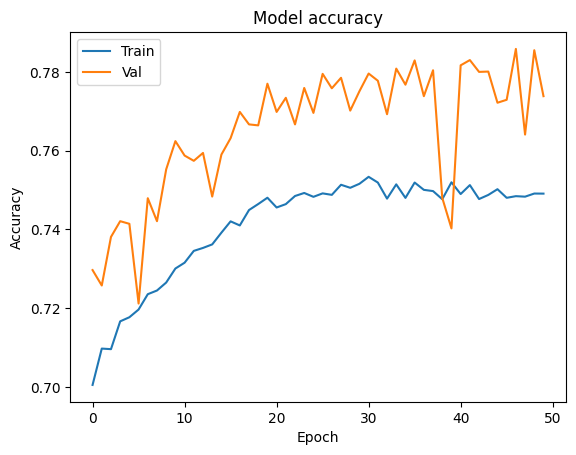

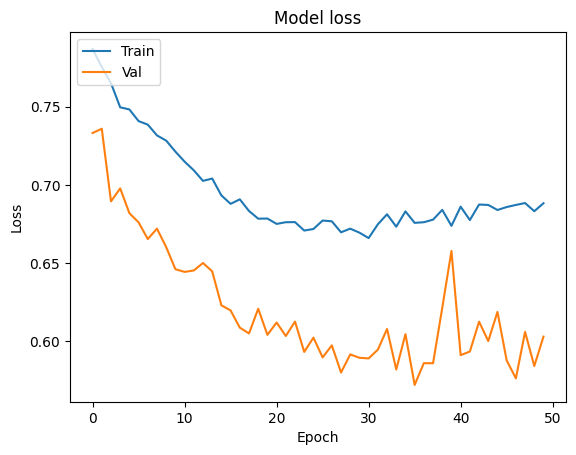

In [18]:
plot_history(history)
 

What could you notice in the loss graph training the model over large number of epochs (50 is sufficient)?

(Training loss continue to dicrease in a flatten way until to go near 0; validation loss after a while starts to increase significantly -> OVERFITTING)

### Evaluate the model

In [19]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7788 - loss: 0.5860
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7749 - loss: 0.6202
Train: 0.777, Test: 0.771


**Try to play with these parameters (loss and optimizers) in order to see how this choice affects the accuracy.**
What do you expect? which is faster?

## 1.3 Overfitting
Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.<br>
A **"simple model"** in this context is a model where the distribution of parameter values has *less entropy* (or a model with fewer parameters altogether).<br><br>
**How to improve generalization of our model on unseen data?**<br>
There exists different methods, the most used are:<br>
    1. Dropout<br>
    2. Early stopping<br>

### 1.3.1 Dropout
Dropout (http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) is one of the most effective and most commonly used regularization techniques for neural networks.<br>
**Dropout**, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.<br>

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5; at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [20]:
# Build the model

model_DO = tf.keras.Sequential()
model_DO.add(tf.keras.layers.Flatten())
model_DO.add(tf.keras.layers.Dropout(0.2))
model_DO.add(tf.keras.layers.Dense(512, input_dim=(28*28), activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dropout(0.2))
model_DO.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dropout(0.1))
model_DO.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dropout(0.1))
model_DO.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))


# Compile the model
model_DO.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])  # Passa 'accuracy' come lista


# TOY Train
epochs = 2
history = model_DO.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data =(x_val, y_val))


Epoch 1/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5539 - loss: 2.0680 - val_accuracy: 0.6535 - val_loss: 14.7565
Epoch 2/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5096 - loss: 1327.0450 - val_accuracy: 0.5508 - val_loss: 9774.3320


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4715 - loss: 27186.5684 - val_accuracy: 0.4983 - val_loss: 54389.0977
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4497 - loss: 120704.2891 - val_accuracy: 0.5039 - val_loss: 206075.7812
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4488 - loss: 378805.8125 - val_accuracy: 0.4501 - val_loss: 701594.4375
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4242 - loss: 873993.3750 - val_accuracy: 0.4428 - val_loss: 1347475.0000
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4362 - loss: 1458794.3750 - val_accuracy: 0.4848 - val_loss: 1771712.6250
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4278 - loss: 2448724.5000 - val_accuracy: 0.4535 - val_loss: 2757426.7500
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4283 - loss: 3633920.2500 - val_accuracy: 0.4573 - val_loss: 3962406.2500
Epoch 8/50
375/375 ━━━

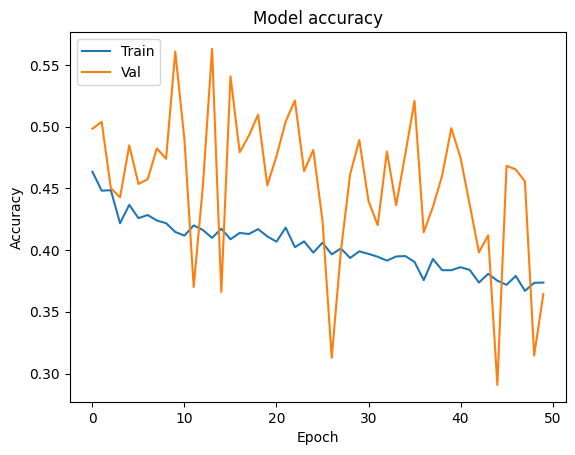

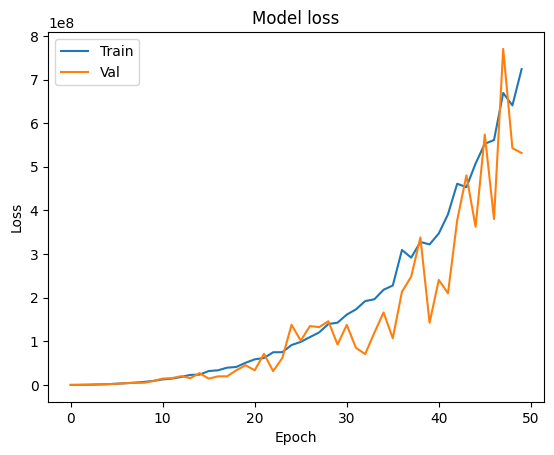

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3746 - loss: 525836800.0000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3754 - loss: 509916064.0000
Train: 0.371, Test: 0.370


In [21]:
# Train with DROP OUT
epochs = 50
history = model_DO.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data =(x_val, y_val))

plot_history(history)

# Evaluate
_, train_acc = model_DO.evaluate(x_train, y_train, verbose=1)
_, test_acc = model_DO.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### 1.3.3 Early stopping
Validation can be used to detect when overfitting starts during supervised training of a neural network; training is then stopped before convergence to avoid the overfitting.<br>



In [22]:
import tensorflow as tf
import os

# EarlyStopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',        # Monitor the validation loss
    mode='min',                # Mode min, because we want to minimize the loss
    verbose=1,                 # Print when stopping early
    patience=5                 # Number of epochs with no improvement after which training will stop
)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "output/cp.weights.h5"  # Make sure the path ends with .weights.h5
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, 
    monitor='val_loss',       # Monitor the validation loss
    save_weights_only=True,   # Save only the model weights
    verbose=1,                # Print when saving the model
    save_best_only=True,      # Save only the best model (with the lowest validation loss)
    mode='min'                # We want to minimize the loss
)

# Now you can add these callbacks when fitting your model
# Example:
# model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[es, cp_callback])


In [23]:
# Build the model
model_ES = tf.keras.Sequential()
model_ES.add(tf.keras.layers.Flatten())
model_ES.add(tf.keras.layers.Dense(512, input_dim=(28*28), activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

# Compile the model
# Compile the model
model_ES.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Passa 'accuracy' come una lista
)


# TOY Train
epochs = 2
history = model_ES.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, verbose=1, callbacks=[es,cp_callback])
# This may generate warnings related to saving the state of the optimizer.

Epoch 1/2
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5566 - loss: 1575.3724
Epoch 1: val_loss improved from inf to 62311.53125, saving model to output/cp.weights.h5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.5563 - loss: 1606.2682 - val_accuracy: 0.3249 - val_loss: 62311.5312
Epoch 2/2
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4030 - loss: 188226.5781
Epoch 2: val_loss did not improve from 62311.53125
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4030 - loss: 188752.0000 - val_accuracy: 0.3954 - val_loss: 866218.5625


Epoch 1/50
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6055 - loss: 1039.6222
Epoch 1: val_loss improved from 62311.53125 to 52694.17188, saving model to output/cp.weights.h5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6054 - loss: 1057.3213 - val_accuracy: 0.3437 - val_loss: 52694.1719
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4075 - loss: 187440.2031
Epoch 2: val_loss did not improve from 52694.17188
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4075 - loss: 187574.6406 - val_accuracy: 0.4807 - val_loss: 838867.1875
Epoch 3/50
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4202 - loss: 1398323.8750
Epoch 3: val_loss did not improve from 52694.17188
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4202 - loss: 1399049.3750 - val_accuracy: 0.4179 - val_loss: 3346212.2500
Epoch 4/50
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3997 - loss: 4273414.5000
Epoch 4: val_loss did not improve

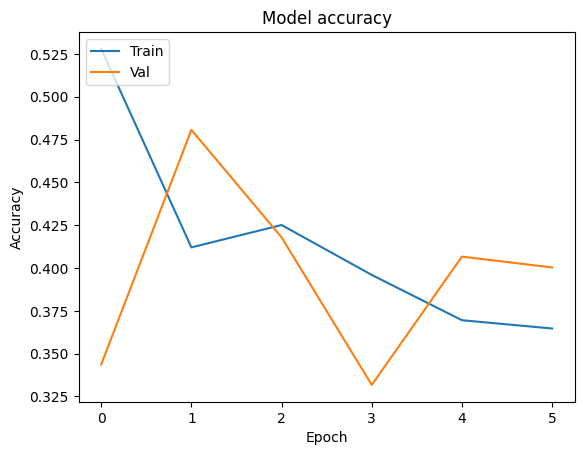

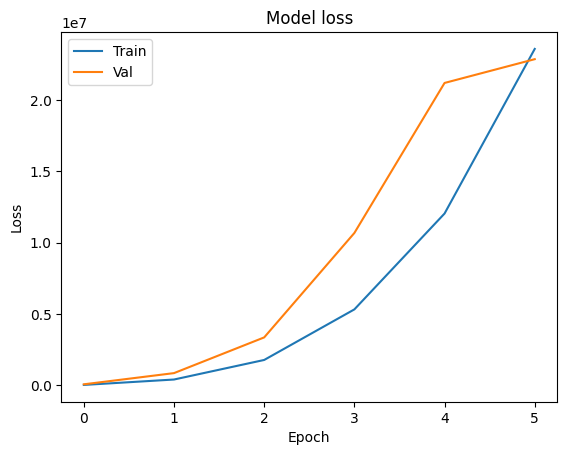

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3998 - loss: 22918662.0000
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3911 - loss: 22916946.0000
Train: 0.396, Test: 0.394


In [24]:
# Build the model
model_ES = tf.keras.Sequential()
model_ES.add(tf.keras.layers.Flatten())
model_ES.add(tf.keras.layers.Dense(512, input_dim=(28*28), activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

# Compile the model
model_ES.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Passa 'accuracy' come una lista
)


# Train
epochs = 50
history = model_ES.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, verbose=1, callbacks=[es,cp_callback])
# This may generate warnings related to saving the state of the optimizer.

plot_history(history)

# Evaluate
_, train_acc = model_ES.evaluate(x_train, y_train, verbose=1)
_, test_acc = model_ES.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Load weights
The saved weights can then be loaded and evaluated any time by calling the load_weights() function.


In [25]:
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
# link https://www.tensorflow.org/tutorials/keras/save_and_restore_models

# Importa il modulo per il checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

# Crea un percorso per il checkpoint con l'estensione corretta
checkpoint_path = "output/cp.weights.h5"  # Usa l'estensione .weights.h5

# Crea il callback per salvare solo i pesi
cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', 
                               save_weights_only=True, verbose=1)

# Carica i pesi salvati
model_ES.load_weights(checkpoint_path)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


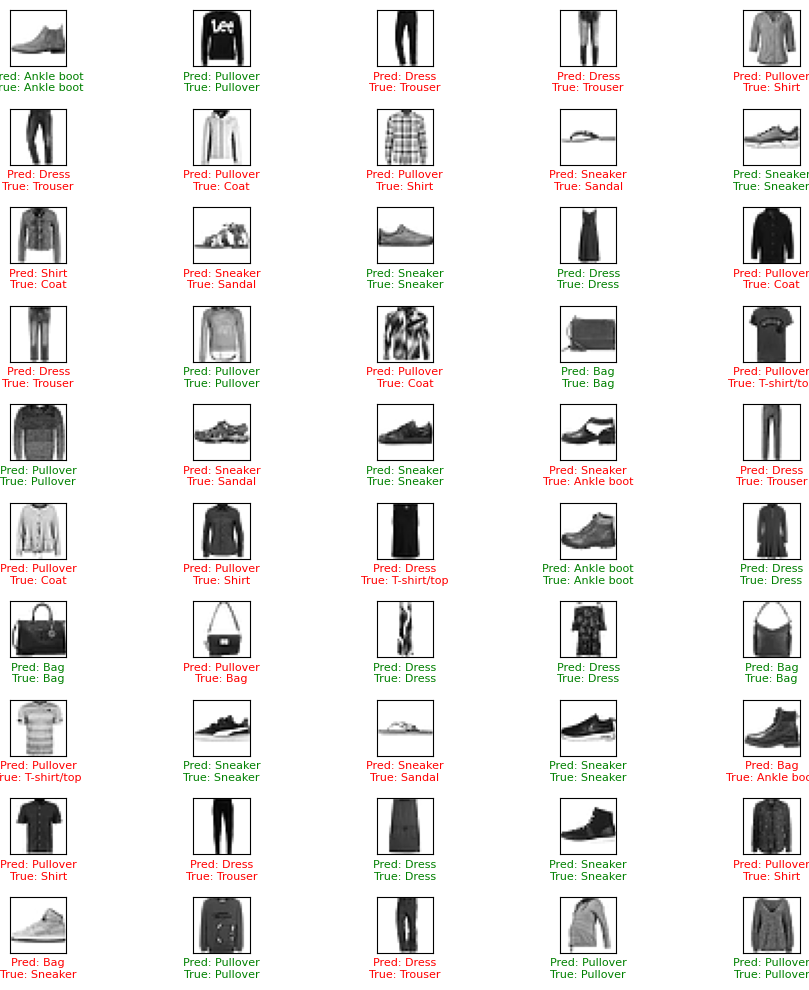

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Fai delle predizioni sui dati di test
predictions = model_DO.predict(x_test)

# Imposta la dimensione della figura
plt.figure(figsize=(10, 10))

# Mostra le prime 50 immagini con le etichette predette
for i in range(50):
    plt.subplot(10, 5, i+1)  # 10 righe e 5 colonne per le immagini
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Visualizza l'immagine
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    
    # Ottieni la classe predetta e quella vera
    predicted_label = np.argmax(predictions[i])  # Ottieni l'indice della classe con la probabilità più alta
    true_label = y_test[i]  # Etichetta vera
    
    # Verifica se la predizione è corretta
    if predicted_label == true_label:
        label_color = 'green'  # Colore verde se predizione è corretta
    else:
        label_color = 'red'  # Colore rosso se predizione è errata

    # Posiziona la scritta sotto l'immagine
    plt.xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", 
               fontsize=8, color=label_color)

# Visualizza la figura
plt.tight_layout()  # Per evitare che le etichette vengano tagliate
plt.show()


